In [1]:
import pandas as pd
import datetime as date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
# compdata = pd.read_csv("./data/sp500_companies.csv")
# indexdata = pd.read_csv("./data/sp500_index.csv")

stockdata = pd.read_csv("./data/sp500_stocks.csv")
stockdata["Date"] = pd.to_datetime(stockdata.Date)

In [22]:
def choose_stock_time(choose_all = False, symbol="AAPL", year=0, month=0):
    year_start = stockdata["Date"].iloc[-1].year - year
    month_start = stockdata["Date"].iloc[-1].month - month
    day_start = stockdata["Date"].iloc[-1].day
    start_date = date.datetime(year_start, month_start, day_start)
    if choose_all == True:
        return stockdata.loc[(stockdata.Date>=start_date)]
    else:
        return stockdata.loc[(stockdata.Symbol==symbol) & (stockdata.Date>=start_date)]

def plot_ema(symbol="AAPL", year=0, month=0, position = "Adj Close", ema = True):
    data = choose_stock_time(symbol=symbol,year=year,month=month)
    plt.figure(figsize=(12,6))
    plt.plot(data["Date"], data[position], label=position)
    if ema == True:
        data["ema-50"] = data[position].ewm(span=50, adjust=False).mean()
        data["ema-200"] = data[position].ewm(span=200, adjust=False).mean()
        plt.plot(data["Date"], data["ema-50"], label="EMA-50")
        plt.plot(data["Date"], data["ema-200"], label="EMA-200")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Price (USD)")
    plt.show()

/var/folders/sh/g6n8_01x0qqbb4xxwmrw8jj80000gn/T/ipykernel_4463/3595141201.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ema-50"] = data[position].ewm(span=50, adjust=False).mean()
/var/folders/sh/g6n8_01x0qqbb4xxwmrw8jj80000gn/T/ipykernel_4463/3595141201.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ema-200"] = data[position].ewm(span=200, adjust=False).mean()


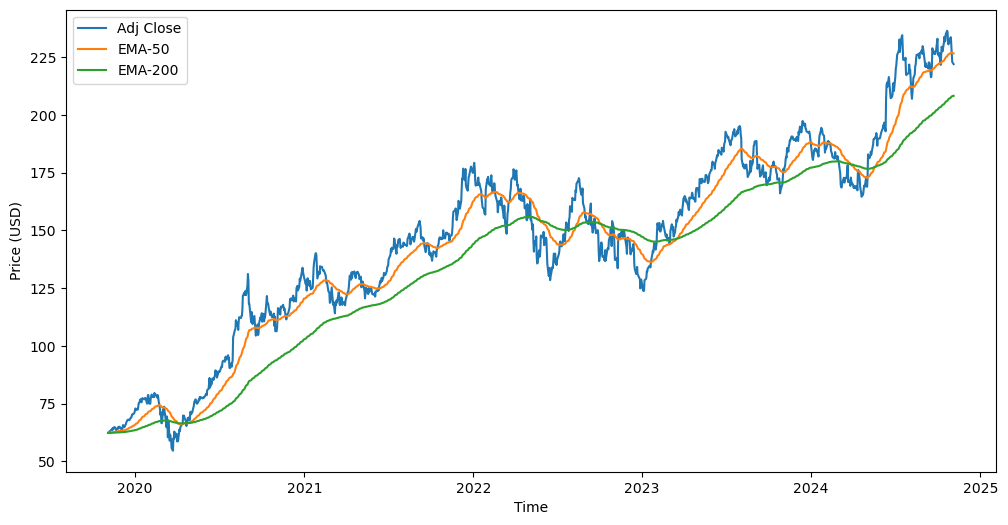

In [ ]:
plot_ema(symbol="AAPL", year=5, month=0)

In [28]:
from matplotlib import cm

In [143]:
# plot all market   
def plot_all_ema(ema=50, year=1, month=1):
    data = choose_stock_time(choose_all=True,year=year,month=month)
    data["ema"] = data["Adj Close"].ewm(span=ema, adjust=False).mean() 
    
    ema_matrix = data[["Date", "Symbol", "ema"]]
    ema_matrix = ema_matrix.pivot(index="Date", columns="Symbol").to_numpy()
    
    def normalize(data):
        normalized = data
        for i in range(len(data[0,:])):
            normalized[:,i] = data[:,i] - data.mean(axis=1)
            normalized[:,i] = normalized[:,i]/data.std(axis=1)
        return normalized
    
    ema_matrix = normalize(ema_matrix)

    # # plot data
    colors = cm.viridis(np.linspace(0., 0.95, len(ema_matrix[0,:]))) 
    plt.figure(figsize=(12,6))
    for i in range(len(ema_matrix[0,:])):
        plt.plot(ema_matrix[:,i], color=colors[i])
    
    plt.show()

/var/folders/sh/g6n8_01x0qqbb4xxwmrw8jj80000gn/T/ipykernel_4463/2276189530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ema"] = data["Adj Close"].ewm(span=ema, adjust=False).mean()


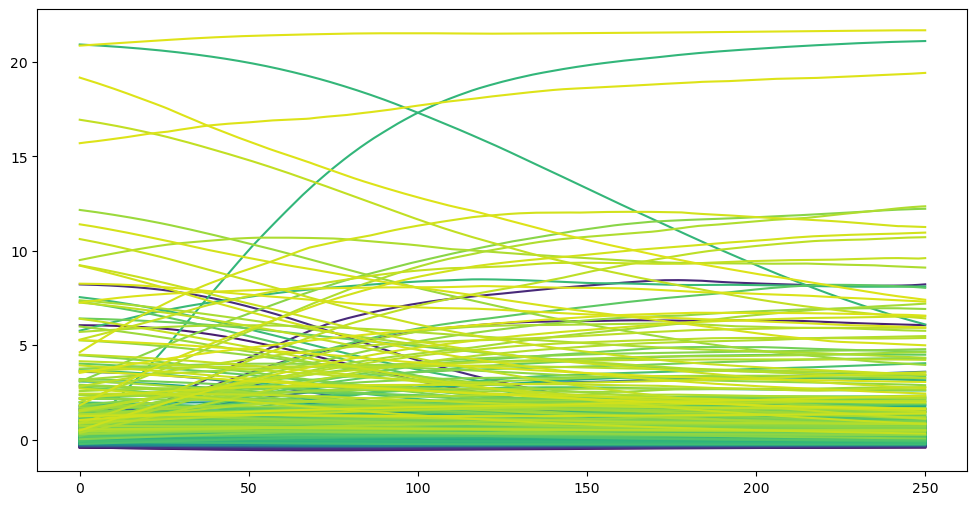

In [144]:
plot_all_ema(ema=200,year=1,month=0)

In [92]:
len(stockdata.columns)

8